# 결정 트리 분류

- 트리는 분류(classification)와 회귀에 모두 사용된다
- 분류 모델부터 소개한다
- 랜덤 포레스트로 성능 향상

## 성별 예측

- 성별을 분류하는 예측모델
- 타이타닉 생존자 예측 모델 (선형 모델과 트리 모델 비교)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.ensemble import RandomForestClassifier

## 남여 키, 몸무게, 성별 데이터

In [104]:
data = pd.read_csv("https://github.com/data-labs/data/raw/main/weight-height.csv")
print(data.shape)
data[:5]

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [105]:
# 성별 인코딩, 단위 변환 (인치, 파운드 --> cm, kg)
data.Gender = data.Gender.map({'Male':0, 'Female':1})
data.Height = data.Height*2.54 # cm
data.Weight = data.Weight*0.453592 # kg
data[:5]

,Gender,Height,Weight
0,0,187.571423,109.720985
1,0,174.706036,73.622732
2,0,188.239668,96.497550
3,0,182.196685,99.809504
4,0,177.499761,93.598619


In [106]:
# 사본 사용 (원본 백업)
df = data.copy()

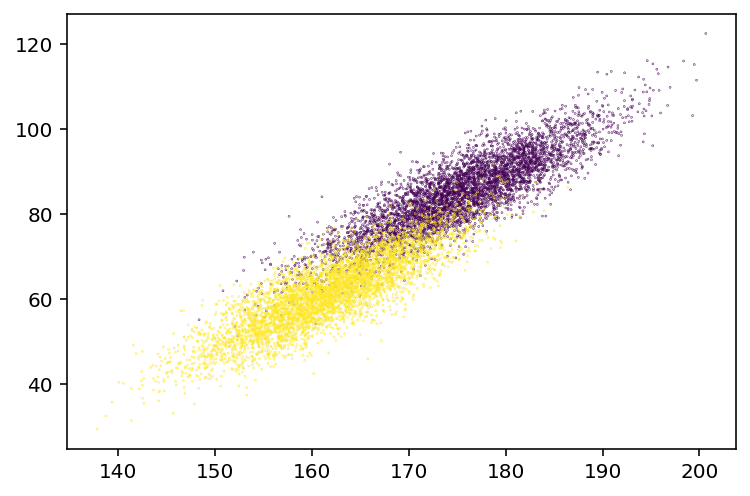

In [107]:
# 남성(0)은 갈색, 여성(1)은 노란색
plt.scatter(df.Height,df.Weight,c=df.Gender,s=0.05)

##  성별  분류
- X: 키와 몸무게 (2개의 특성을 사용)
- y: 성별 (남여를 구분하는 이진 분류 문제)

In [108]:
scaler = StandardScaler()
X = scaler.fit_transform(df[["Height", "Weight"]])
y = df.Gender

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 선형 분류 모델

In [114]:
lin = SGDClassifier() # (1) 모델 생성
lin.fit(X_train, y_train) # (2) 훈련
lin.score(X_test, y_test) # (3) 평가 (정확도)

0.918

In [133]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train) 
rfc.score(X_test, y_test).round(4)

0.906

### 결정 트리 모델

In [121]:
dtc = DecisionTreeClassifier() # (1) 모델 생성
dtc.fit(X_train, y_train) # (2) 훈련
dtc.score(X_test, y_test) # (3) 평가 (정확도)

0.8788

In [122]:
def show_clf_result(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [123]:
y_pred = dtc.predict(X_test)
show_clf_result(y_test, y_pred)

[[1087  156]
 [ 147 1110]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1243
           1       0.88      0.88      0.88      1257

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



### 트리 동작

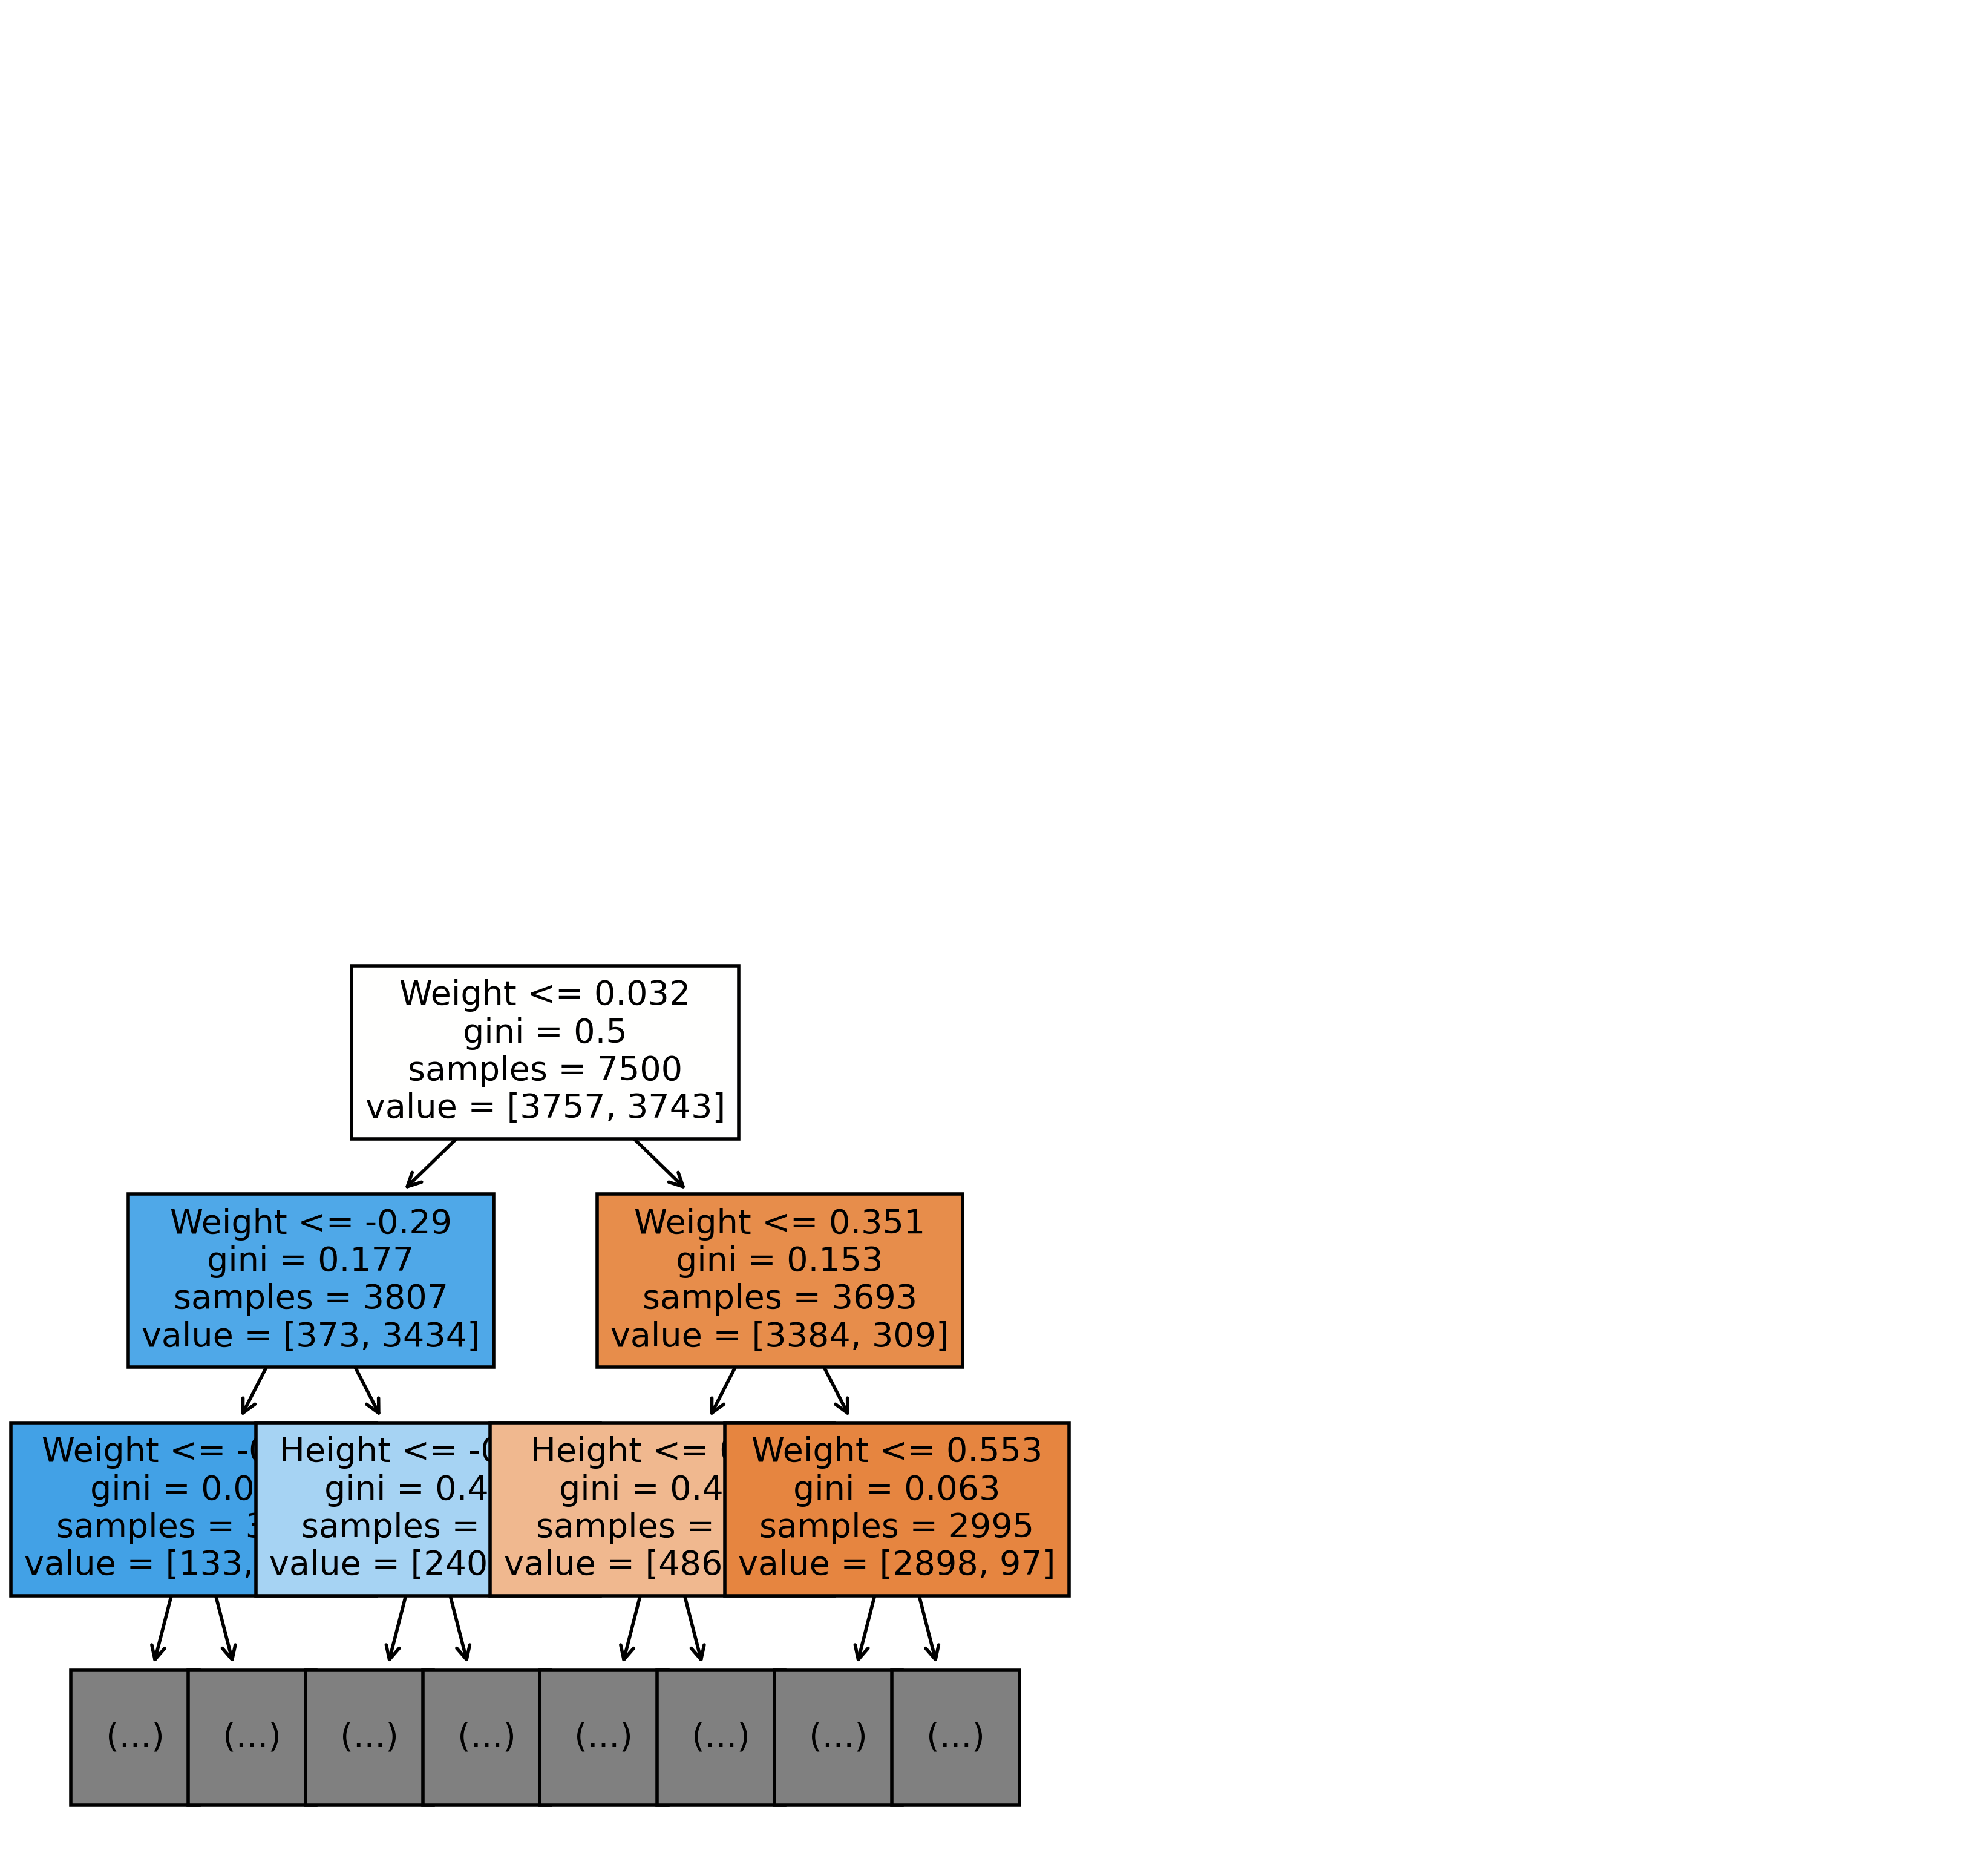

In [126]:
from sklearn import tree
import matplotlib
plt.figure(figsize=(10,10))
plt.rcParams["figure.dpi"] = 200

tree.plot_tree(dtc, fontsize=10,
              feature_names=["Height", "Weight"],
              filled=True,
              impurity=True,
              max_depth=2)
plt.show()

## 엔트로피

- 확률 p인 사건의 가치:  $log$(${1}\over{p}$) 
- 엔트로피=확률x기대치: $Entropy(H)$ = $p$ $log$(${1}\over{p}$)

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%208.32.23.png?raw=1" align='left'  width=200>


## 크로스 엔트로피 

- 참고: 분류 모델의 손실함수, 즉 학습을 하면서 줄여야 할 대상 값은 크로스 엔트로피를 사용한다
- 분류가 잘 수행될수록 (즉, 분류된 하위 그룹의 p가 1 또는 0으로 수렴할수록) 크로스 엔트로피의 합은 점차 줄어들며 이를 분류의 손실함수로 사용한다
- 계산량을 줄이기 위해서 gini 계수를 사용하기도 한다 (디폴트 값)

<img  src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.13.11.png?raw=1" align='left'  width=400>

- 엔트로피: 

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%208.29.58.png?raw=1" align='left'  width=150>

- gini 계수:

$1 - \sum {p_{i}}^2$

In [127]:
dtc.feature_importances_

array([0.14255689, 0.85744311])

In [129]:
def plot_features_weights(features, weights):
    W = pd.DataFrame({'Weights':weights}, features)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', 
                        color='b', figsize=(8,6))
    plt.gca().legend_ = None

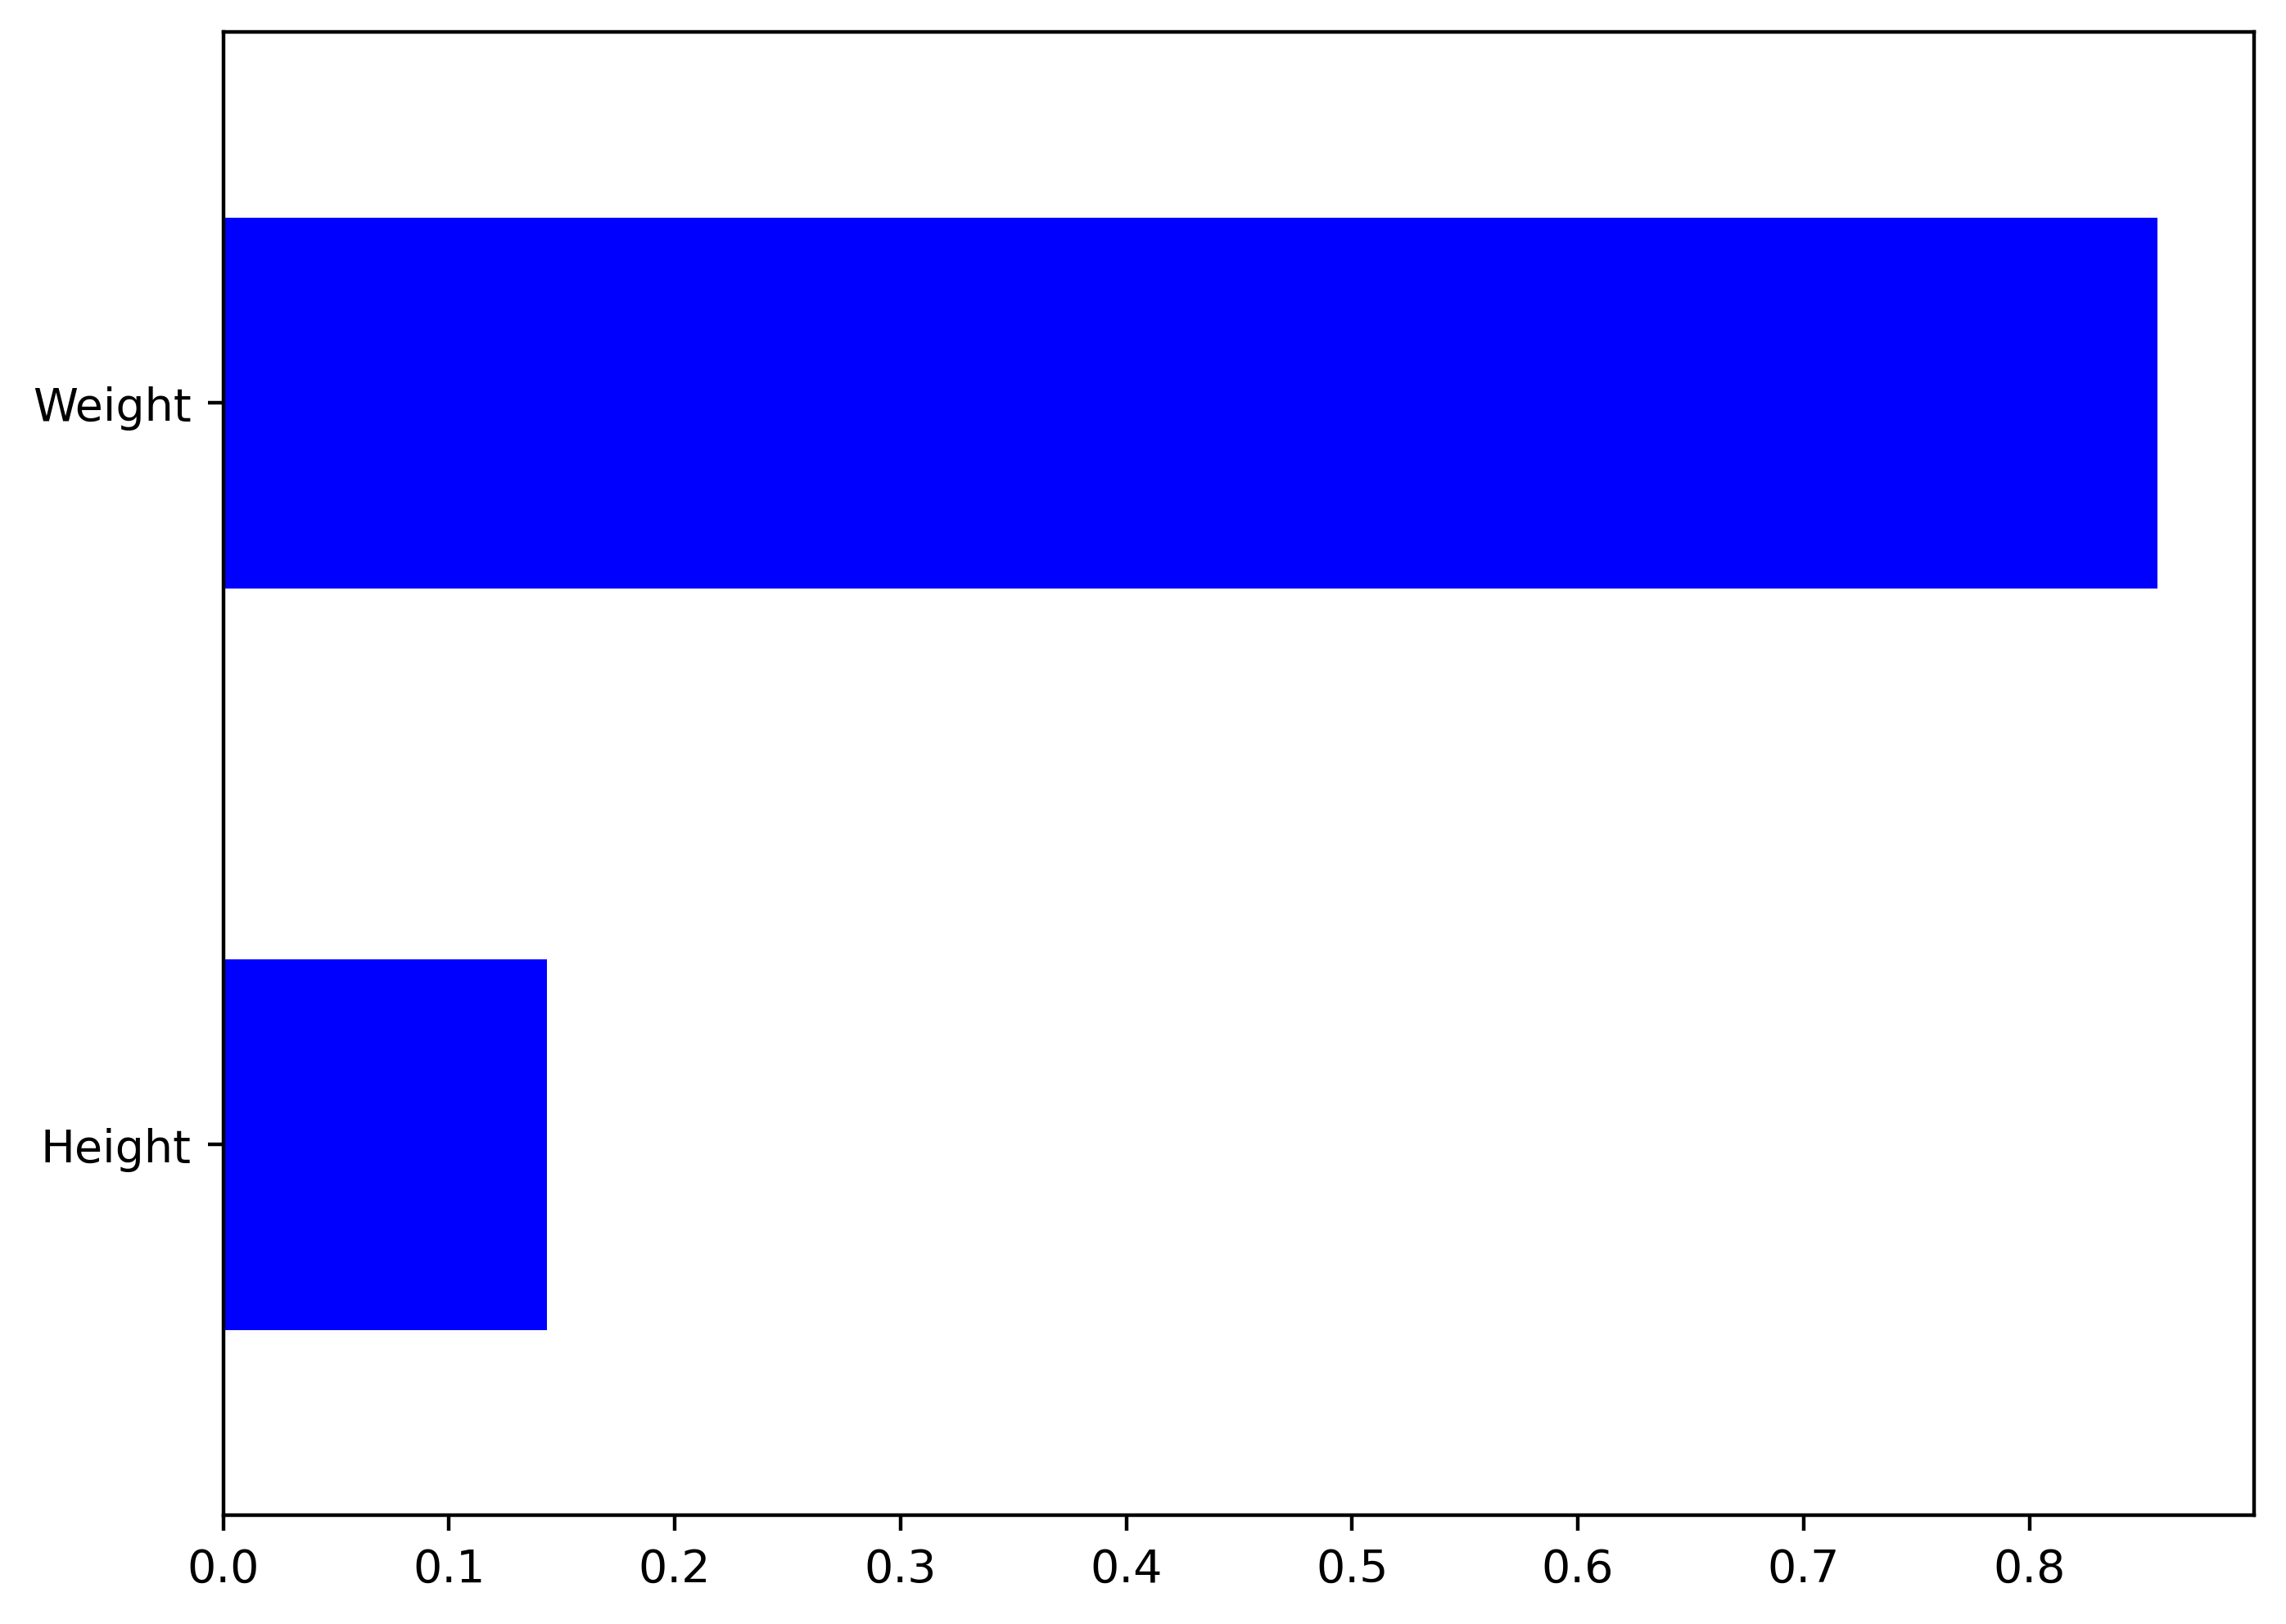

In [131]:
plot_features_weights(["Height", "Weight"], model.feature_importances_)

# 타이타닉 생존자 예측

In [24]:
data_titanic = pd.read_csv("https://raw.githubusercontent.com/StillWork/data/master/titanic_train.csv")
print(data.shape)
data_titanic[:3]

(10000, 3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [25]:
# 사본 사용
df = data_titanic.copy()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 결측치 샘플 삭제
- 항구 데이터(Embarked)는 결측치가 2개 뿐이고 다른 값으로 대체하기가 어려우므로 샘플을 삭제한다

In [26]:
df = df[~df["Embarked"].isnull()]
df.shape

(889, 12)

## 결측치 대체

- Age(나이)는 결측치가 많으나, 의미 있는 정보이므로 삭제하지 않고 다른 값으로 대체한다 (평균치 사용)

In [27]:
# 결측치를 평균 나이로 대체 (대체한 것을 즉시 반영함)
df.Age.fillna(df.Age.mean(), inplace=True)

## 선실등급, 성별, 항구명 원핫 인코딩

In [28]:
df_class = pd.get_dummies(df["Pclass"], prefix="Class")
df_sex = pd.get_dummies(df["Sex"], prefix="Sex")
df_embarked = pd.get_dummies(df["Embarked"], prefix="Embarked")

## 특성 컬럼 취합

In [29]:
# 사용할 아나로그 변수 컬럼들을 먼저 선택한다
X = df[['Age', 'SibSp', 'Parch', 'Fare',]]
X[:3]

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250


In [30]:
# 요금은 로그 변환한 값을 사용한다 (오류 발생을 피하기 위해서 작은 값을 더해준다)
X.Fare = np.log(X.Fare +0.1)

/Users/hwa-kim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
# 원핫 인코딩한 카테고리 변수 컬럼들을 가로로 붙인다 (axis=1)
X = pd.concat([X, df_embarked, df_class, df_sex], axis=1)
X[:3]

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,22.0,1,0,1.994700,0,0,1,0,0,1,0,1
1,38.0,1,0,4.268064,1,0,0,1,0,0,1,0
2,26.0,0,0,2.082562,0,0,1,0,0,1,1,0


## 스케일링
- 일반적으로 연속형, 아나로그 값은 스케일링을 하는 것이 안전하다
- 결정트리, 랜덤 포레스트 등 트리 계열의 모델에서는 스케일링을 하지 않아도 되지만 선형모델, 신경망 모델 등에서 스케일링을 해야 잘 동작한다
- 기본적으로는 표준 스케일링을 하며, 최대값과 최소값의 범위가 분명히 한정되어 있을 때는 min-max 스케일링도 사용한다

In [32]:
# 표준 스케일링 적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(X[['Age', 'SibSp', 'Parch', 'Fare']])

In [33]:
X[:3]

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,-0.589620,0.431350,-0.474326,-0.755613,0,0,1,0,0,1,0,1
1,0.644848,0.431350,-0.474326,1.232311,1,0,0,1,0,0,1,0
2,-0.281003,-0.475199,-0.474326,-0.678783,0,0,1,0,0,1,1,0


- 목적 변수

In [34]:
y = df.Survived

## 선형 분류

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)
model = SGDClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7533632286995515

In [55]:
model.coef_

array([[-0.52985485,  0.52854036, -2.32490555]])

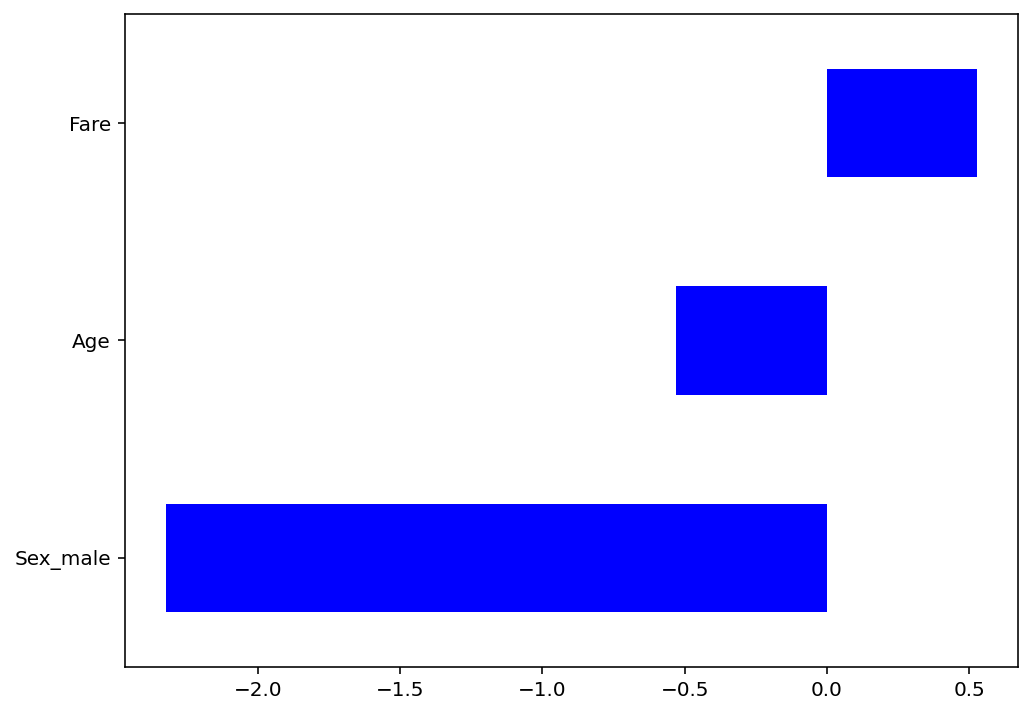

In [56]:
plot_features_weights(X.columns, model.coef_.ravel())

## 결정 트리 분류

In [57]:
model = DecisionTreeClassifier() # 모델 생성
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7309417040358744

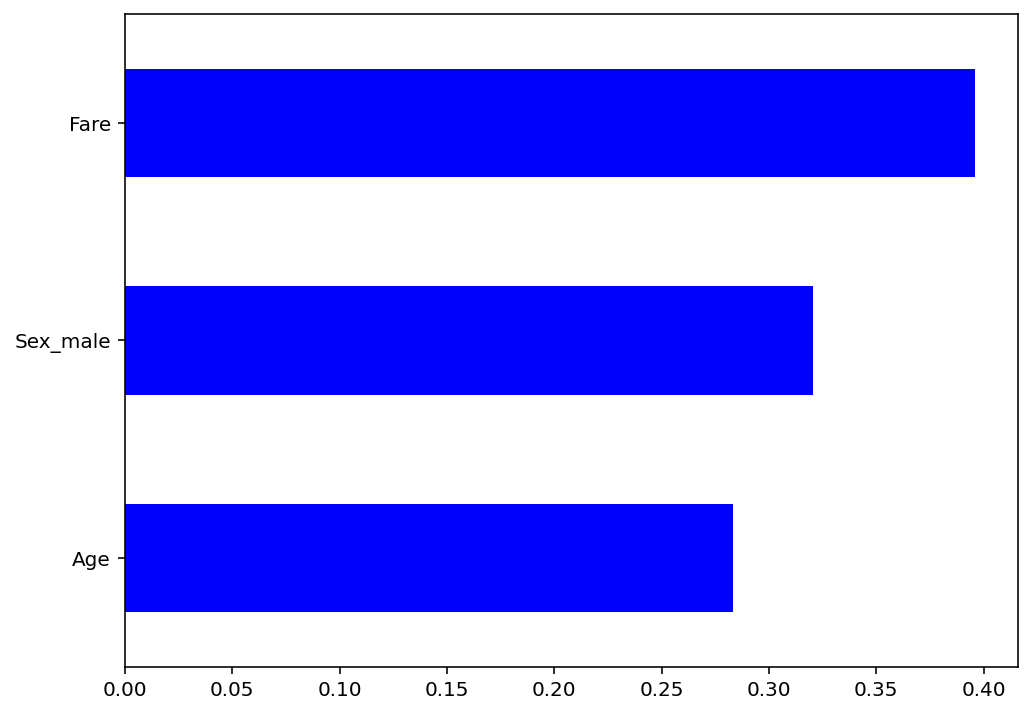

In [58]:
plot_features_weights(X.columns, model.feature_importances_)

## 랜덤 포레스트

In [59]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.757847533632287

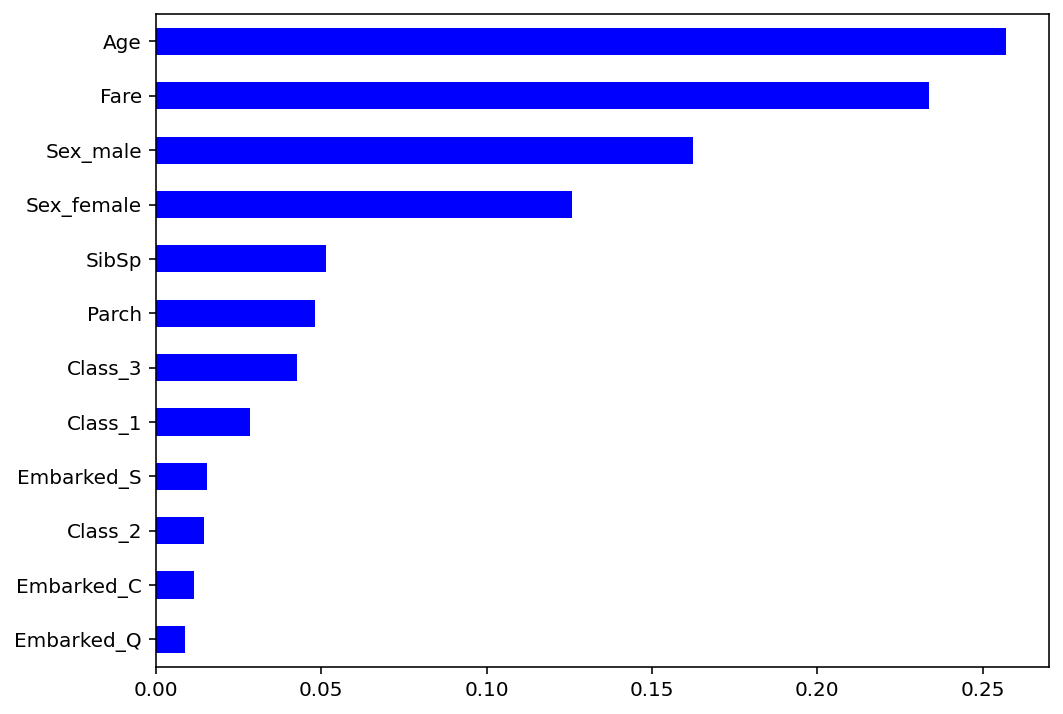

In [44]:
plot_features_weights(X.columns, model.feature_importances_)

In [ ]:
# 과제: X의 특성수(컬럼수)를 3개만 사용할 때 성능비교 선형, DT, RF
# 어떤 3개를 고를때 가장 성능이 좋을 것인가?

In [180]:
X.columns

Index(['height', 'weight'], dtype='object')

In [49]:
features = ['Age', 'Fare', 'Sex_male']
X = X[features]

In [51]:
X

,Age,Fare,Sex_male
0,-5.896199e-01,-0.755613,1
1,6.448480e-01,1.232311,0
2,-2.810029e-01,-0.678783,0
3,4.133853e-01,0.975220,0
4,4.133853e-01,-0.665268,1
...,...,...,...
886,-2.038487e-01,-0.250263,1
887,-8.210826e-01,0.477197,0
888,-5.482138e-16,0.262609,0
889,-2.810029e-01,0.477197,1


# 결정트리 회귀 모델

In [181]:
from numpy.random import randn, rand
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [182]:
N = 200
height = 4*randn(N) + 173
weight = height * 1.2 + 4* randn(N) - 130
foot = height * 0.15 + 0.2*randn(N)

In [183]:
scaler = StandardScaler()
df = pd.DataFrame({'height': height, 'weight':weight, 'foot':foot})
df.loc[:,['h_sc','w_sc']] = scaler.fit_transform(df[['height','weight']].copy())
df["foot_s"] = MinMaxScaler().fit_transform(df.foot.values.reshape(-1,1))
df

,height,weight,foot,h_sc,w_sc,foot_s
0,174.751273,79.144176,26.106908,0.490744,0.321480,0.441611
1,168.553489,82.700548,25.320140,-0.964363,0.869065,0.227690
2,182.005195,84.940992,27.825848,2.193811,1.214032,0.908990
3,173.291929,76.983240,25.920117,0.148121,-0.011245,0.390823
4,178.582382,81.523428,27.003977,1.390207,0.687820,0.685524
...,...,...,...,...,...,...
195,173.553432,76.374836,25.683279,0.209517,-0.104923,0.326427
196,169.580452,67.152609,25.606671,-0.723254,-1.524894,0.305597
197,178.524800,91.205017,26.886464,1.376688,2.178521,0.653572
198,168.966479,72.911908,25.534586,-0.867402,-0.638119,0.285998


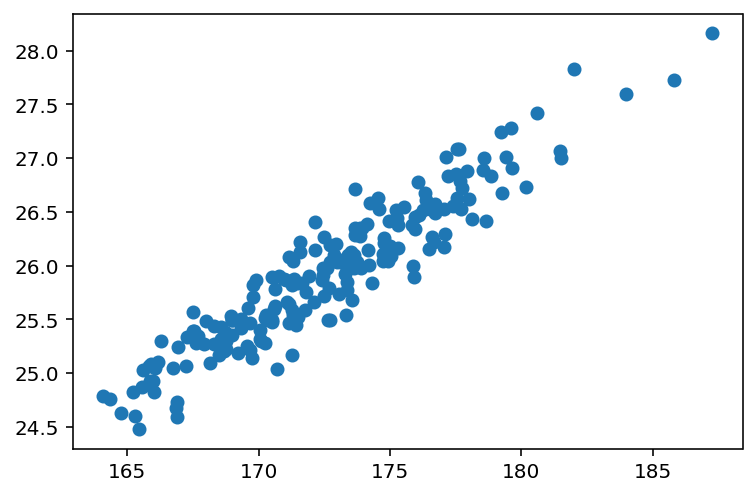

In [184]:
plt.scatter(df.height, df.foot)

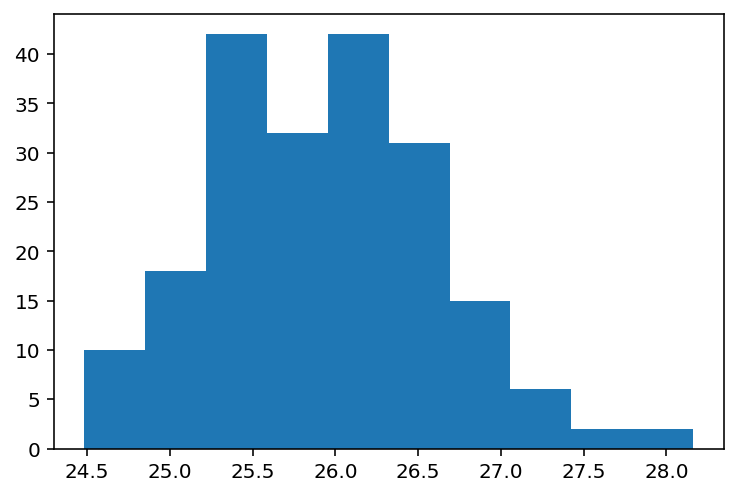

In [185]:
_=plt.hist(foot)

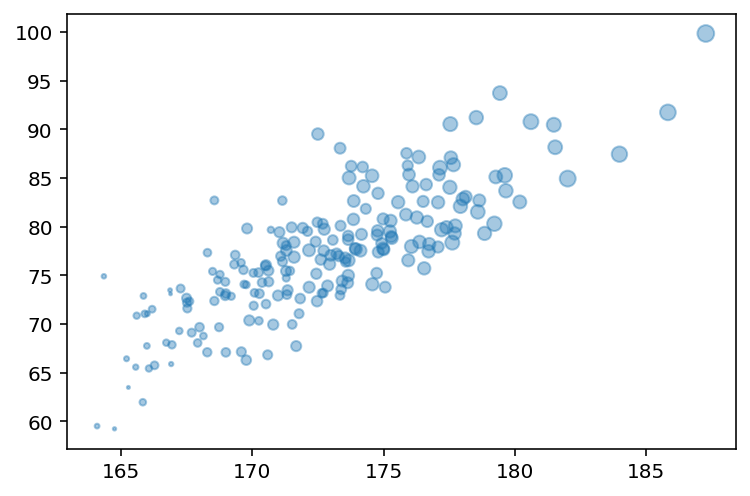

In [186]:
plt.scatter(df.height, df.weight, s=df.foot_s*70, alpha=0.4)

In [187]:
X = df[['height', 'weight']]
y = df.foot

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

lr.fit(X_train, y_train) 
dtr.fit(X_train, y_train) 
rfr.fit(X_train, y_train) 
print('선형모델: ', lr.score(X_test, y_test).round(4))
print('트리모델: ', dtr.score(X_test, y_test).round(4))
print('랜덤포레스트: ', rfr.score(X_test, y_test).round(4))

선형모델:  0.7841
트리모델:  0.6798
랜덤포레스트:  0.7563


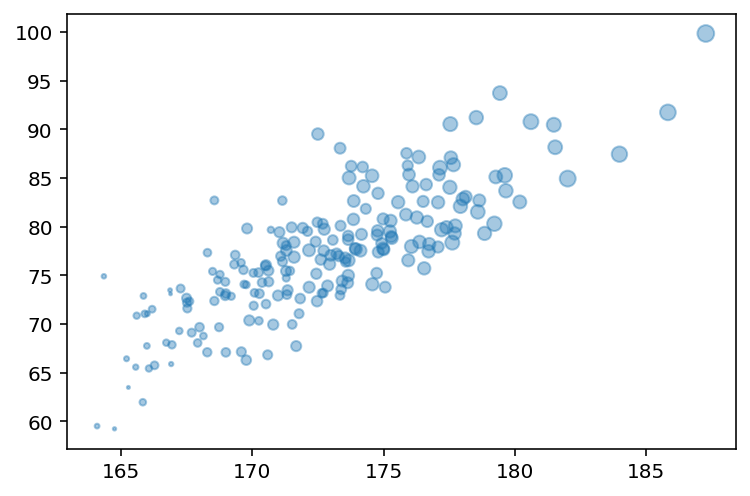

In [190]:
plt.scatter(height, weight, s=df.foot_s*70, alpha=0.4)

## 선형관계가 아닌 분포의 경우

In [148]:
foot = 25 + 8*norm().pdf((height-173)/4.0) + 0.2*randn(N)

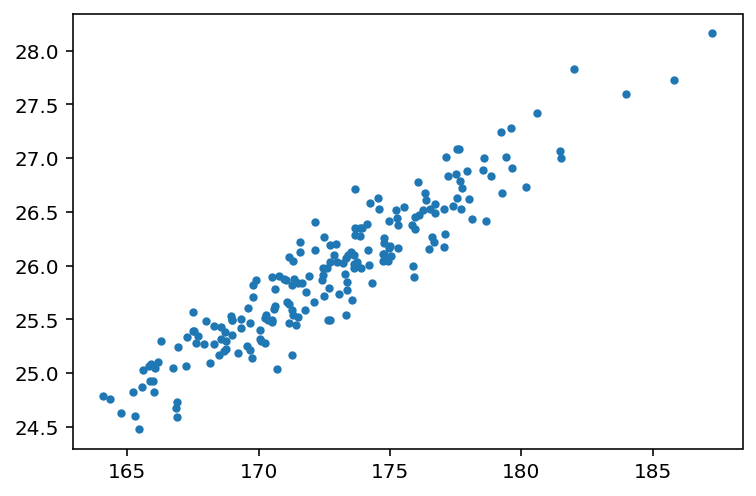

In [192]:
plt.scatter(height, foot,s=10)

In [193]:
df['foot'] = foot
df["foot_s"] = MinMaxScaler().fit_transform(foot.reshape(-1,1))
df

,height,weight,foot,h_sc,w_sc,foot_s
0,174.751273,79.144176,26.106908,0.490744,0.321480,0.441611
1,168.553489,82.700548,25.320140,-0.964363,0.869065,0.227690
2,182.005195,84.940992,27.825848,2.193811,1.214032,0.908990
3,173.291929,76.983240,25.920117,0.148121,-0.011245,0.390823
4,178.582382,81.523428,27.003977,1.390207,0.687820,0.685524
...,...,...,...,...,...,...
195,173.553432,76.374836,25.683279,0.209517,-0.104923,0.326427
196,169.580452,67.152609,25.606671,-0.723254,-1.524894,0.305597
197,178.524800,91.205017,26.886464,1.376688,2.178521,0.653572
198,168.966479,72.911908,25.534586,-0.867402,-0.638119,0.285998


In [194]:
y = df.foot

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
lr.fit(X_train, y_train) 
dtr.fit(X_train, y_train) 
rfr.fit(X_train, y_train) 
print('선형모델: ', lr.score(X_test, y_test).round(4))
print('트리모델: ', dtr.score(X_test, y_test).round(4))
print('래덤포레스트: ', rfr.score(X_test, y_test).round(4))

선형모델:  0.8671
트리모델:  0.7487
래덤포레스트:  0.8201


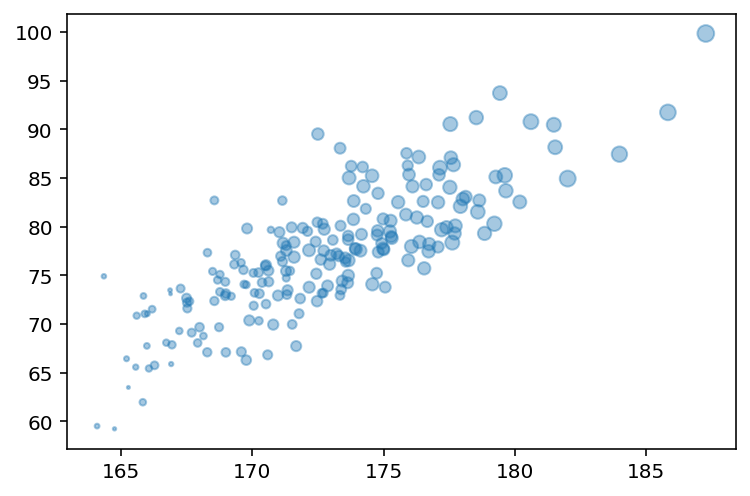

In [196]:
plt.scatter(height, weight, s=df.foot_s*70, alpha=0.4)

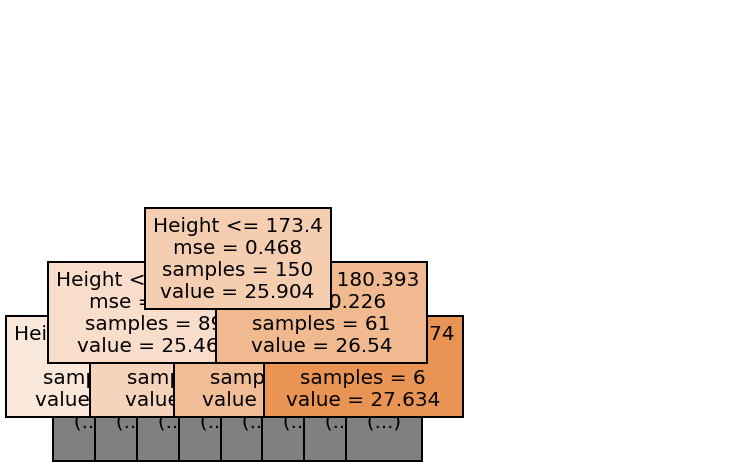

In [197]:
from sklearn import tree

tree.plot_tree(dtr, fontsize=10,
              feature_names=["Height", "Weight"],
              filled=True,
              impurity=True,
              max_depth=2)
plt.show()

## 결정트리 나누는 직선 그리기 (참조)

In [201]:
no_lines = 5
t = tree.export_text(dtr)
t2 = t.split('\n')[:no_lines]
t2

['|--- feature_0 <= 173.40',
 '|   |--- feature_0 <= 169.77',
 '|   |   |--- feature_0 <= 167.08',
 '|   |   |   |--- feature_0 <= 165.52',
 '|   |   |   |   |--- feature_0 <= 165.25']

In [202]:
s2 = "feature_"
r = []
for s in t2:
    if s2 in s:
        r.append(s[s.index(s2) + len(s2):])
r

['0 <= 173.40', '0 <= 169.77', '0 <= 167.08', '0 <= 165.52', '0 <= 165.25']

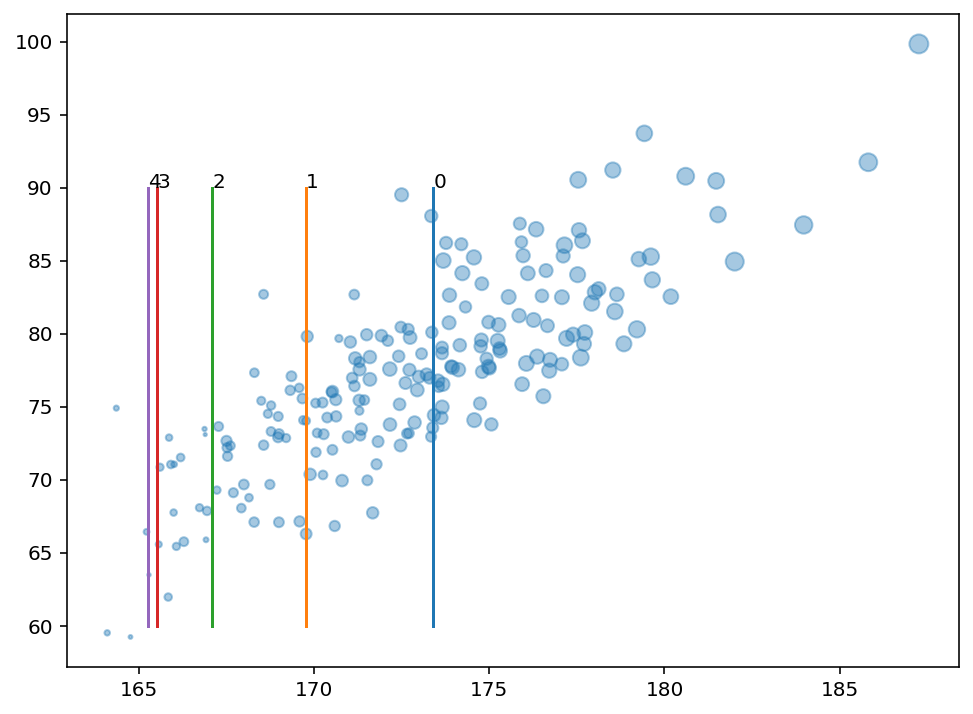

In [203]:
p = []
for s in r:
    p.append((int(s.split()[0]), float(s.split()[2])))
plt.figure(figsize=(8,6))
plt.scatter(height, weight, s=df.foot_s*90, alpha=0.4)
for i, q in enumerate(p):
    if q[0]==0:
        plt.plot((q[1], q[1]), (60,90))
        plt.text(q[1],90, i)
    if q[0]==1:
        plt.plot((160,185),(q[1], q[1]))
        plt.text(185, q[1], i)
